In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error
import os
import seaborn as sns
from sklearn import metrics, tree, ensemble
from sklearn.compose import ColumnTransformer

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import statsmodels.formula.api as smf
import statsmodels.api as sm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = "/content/drive/MyDrive/Colab Notebooks/data_final5.csv"

In [7]:
df = pd.read_csv(file_path)

In [8]:
keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

In [9]:
df['building_type'] = df['building_type'].astype('category')

In [10]:
datatrain = df.iloc[:393588]
datatest = df.iloc[393588:491986]

                            geo_lon   geo_lat  building_type     level  \
geo_lon                    1.000000 -0.122333       0.052563  0.027261   
geo_lat                   -0.122333  1.000000       0.010537  0.117825   
building_type              0.052563  0.010537       1.000000 -0.023383   
level                      0.027261  0.117825      -0.023383  1.000000   
levels                     0.049569  0.178663      -0.027552  0.623272   
rooms                      0.026587  0.021429       0.073705 -0.168398   
area                      -0.011350  0.052811       0.051976 -0.104491   
kitchen_area               0.007167  0.035258       0.092238 -0.004223   
object_type               -0.121033  0.047662      -0.005302  0.116282   
distance_to_cemetery      -0.606709 -0.104496      -0.050699  0.003019   
distance_to_attractions   -0.170104 -0.202663      -0.038576  0.180009   
distance_to_green_zone    -0.101299 -0.173374      -0.017991 -0.115974   
distance_to_metro_station -0.575147 -0

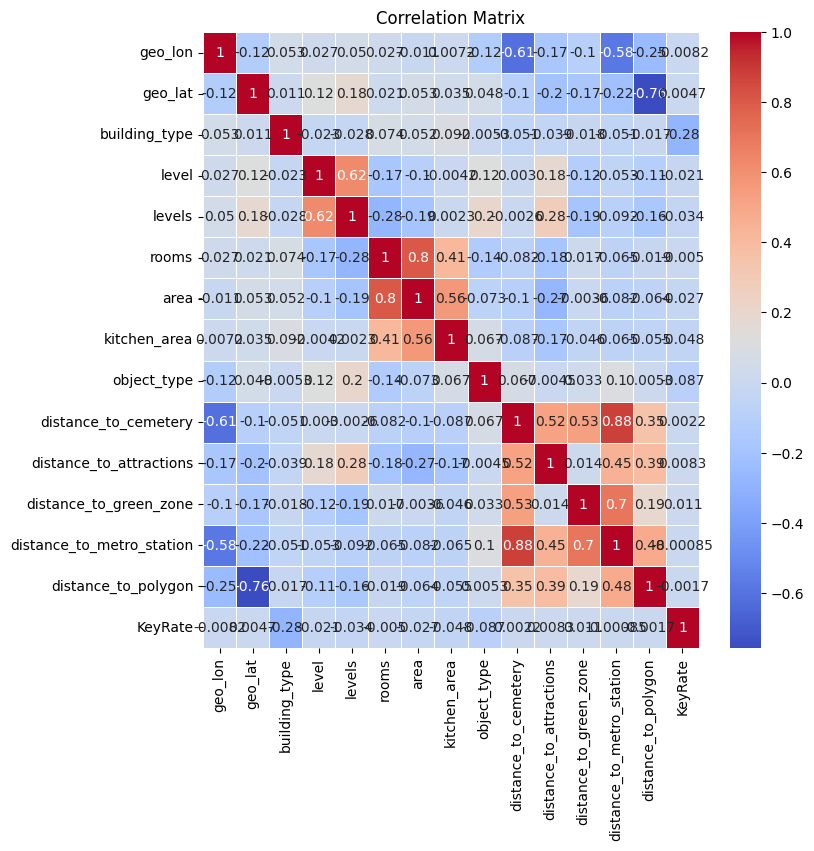

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dfcp = datatrain[['geo_lon', 'geo_lat', 'building_type', 'level', 'levels',
                             'rooms', 'area', 'kitchen_area', 'object_type',
                             'distance_to_cemetery', 'distance_to_attractions',
                             'distance_to_green_zone', 'distance_to_metro_station',
                             'distance_to_polygon', 'KeyRate']]

# Calculate the correlation matrix
corr_matrix = dfcp.corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Add a constant to the independent variables
X = sm.add_constant(datatrain[['geo_lon', 'geo_lat', 'building_type', 'level', 'levels',
                             'rooms', 'area', 'kitchen_area', 'object_type',
                             'distance_to_cemetery', 'distance_to_attractions',
                             'distance_to_green_zone', 'distance_to_metro_station',
                             'distance_to_polygon', 'KeyRate']])

# Fit the OLS model
model = sm.OLS(datatrain['priceL'], X).fit()

# Create a table with summary statistics
summary_stats = pd.DataFrame({
    'Coefficient': model.params,
    'Standard Error': model.bse,
    't-statistic': model.tvalues,
    'p-value': model.pvalues,
    'R-squared': [model.rsquared]*len(model.params),  # <--- Fix: repeat the R-squared value
    'Mean Squared Error': [mean_squared_error(datatrain['priceL'], model.predict(X))]*len(model.params)  # <--- Fix: repeat the mean squared error
})

# Export the table to a CSV file
summary_stats.to_csv('summary_stats.csv', index=False)

In [ ]:
# Create and fit the linear regression model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error

linmodel = LinearRegression()
resultlin = linmodel.fit(datatrain[['geo_lon', 'geo_lat', 'building_type', 'level', 'levels',
                        'rooms', 'area', 'kitchen_area', 'object_type',
                        'distance_to_cemetery', 'distance_to_attractions',
                        'distance_to_green_zone', 'distance_to_metro_station',
                        'distance_to_polygon', 'KeyRate']],
             datatrain['priceL'])

# Print summary of the linear model
print(linmodel.coef_)
print(linmodel.intercept_)

# Make predictions on test data
lmpred = linmodel.predict(datatest[['geo_lon', 'geo_lat', 'building_type',
                                    'level', 'levels', 'rooms', 'area',
                                    'kitchen_area', 'object_type',
                                    'distance_to_cemetery',
                                    'distance_to_attractions',
                                    'distance_to_green_zone',
                                    'distance_to_metro_station', 'distance_to_polygon', 'KeyRate']])

# Calculate Mean Absolute Error (MAE)
maelm = mean_absolute_error(datatest['price'], np.exp(lmpred))

# Calculate Mean Absolute Percentage Error (MAPE)
mapelm = mean_absolute_percentage_error(datatest['price'], np.exp(lmpred))*100

rmslelm = np.sqrt(mean_squared_log_error( datatest['price'] , np.exp(lmpred)))

print("Mean Absolute Error: ", maelm)
print("Mean Absolute Percentage Error: ", mapelm)
print("Root Mean Squared Log Error: ", rmslelm)


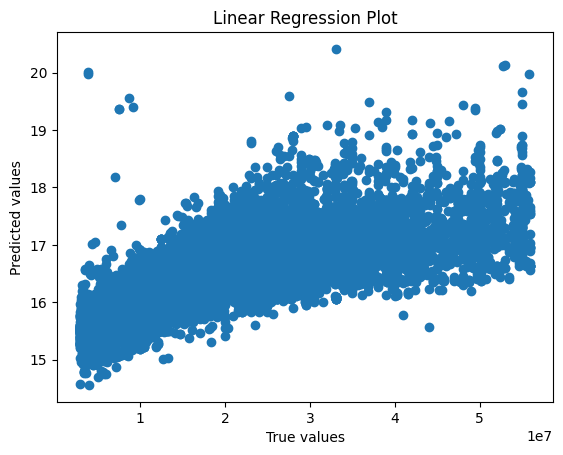

In [ ]:
plt.scatter(datatest['price'], lmpred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Linear Regression Plot")
plt.show()

In [ ]:
mod = smf.ols('priceL ~ geo_lon + geo_lat + building_type + level + levels + rooms + area + kitchen_area + object_type + distance_to_cemetery + distance_to_attractions + distance_to_green_zone + distance_to_metro_station+distance_to_polygon + KeyRate', data=datatrain)
res = mod.fit()
print(res.summary())

beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('myreg.tex', 'w')
f.write(beginningtex)
f.write(res.summary().as_latex())
f.write(endtex)
f.close()

                            OLS Regression Results                            
Dep. Variable:                 priceL   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 6.438e+04
Date:                Thu, 11 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:51:51   Log-Likelihood:                -50208.
No. Observations:              393588   AIC:                         1.005e+05
Df Residuals:                  393567   BIC:                         1.007e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
import statsmodels.api as sm
from scipy import stats

X = datatrain[['geo_lon', 'geo_lat', 'building_type', 'level', 'levels', 'rooms',
        'area', 'kitchen_area', 'object_type', 'distance_to_cemetery',
        'distance_to_attractions', 'distance_to_green_zone',
        'distance_to_metro_station', 'distance_to_polygon', 'KeyRate']]
y = datatrain['price']

X_test = datatest[['geo_lon', 'geo_lat', 'building_type', 'level', 'levels', 'rooms',
        'area', 'kitchen_area', 'object_type', 'distance_to_cemetery',
        'distance_to_attractions', 'distance_to_green_zone',
        'distance_to_metro_station', 'distance_to_polygon', 'KeyRate']]
y_test = datatest['price']


linmodel = LinearRegression()
linmodel.fit(datatrain[['geo_lon', 'geo_lat', 'building_type', 'level', 'levels',
                        'rooms', 'area', 'kitchen_area', 'object_type',
                        'distance_to_cemetery', 'distance_to_attractions',
                        'distance_to_green_zone', 'distance_to_metro_station',
                        'distance_to_polygon', 'KeyRate']],
             datatrain['priceL'])
params = np.append(linmodel.intercept_,linmodel.coef_)
predictions = linmodel.predict(datatrain[['geo_lon', 'geo_lat', 'building_type', 'level', 'levels',
                        'rooms', 'area', 'kitchen_area', 'object_type',
                        'distance_to_cemetery', 'distance_to_attractions',
                        'distance_to_green_zone', 'distance_to_metro_station',
                        'distance_to_polygon', 'KeyRate']])


newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilities
0         7.6487     2.924140e+07       0.0            1.0
1        -0.2951     2.811056e+05      -0.0            1.0
2         0.2753     4.204806e+05       0.0            1.0
3        -0.0117     1.737165e+04      -0.0            1.0
4         0.0027     4.583234e+03       0.0            1.0
5         0.0002     4.112159e+03       0.0            1.0
6         0.0717     3.100738e+04       0.0            1.0
7         0.0093     1.176621e+03       0.0            1.0
8         0.0143     3.117371e+03       0.0            1.0
9         0.0387     4.589701e+04       0.0            1.0
10       -0.0104     9.806128e+03      -0.0            1.0
11       -0.0304     8.131916e+03      -0.0            1.0
12       -0.0166     1.303585e+04      -0.0            1.0
13        0.0098     1.727197e+04       0.0            1.0
14        0.0025     6.273935e+03       0.0            1.0
15        0.0385     2.009630e+04       0.0            1

In [ ]:

# Create and fit the decision tree model
treemodel = DecisionTreeRegressor()
treemodel.fit(datatrain[['geo_lon', 'geo_lat', 'building_type', 'level', 'levels','rooms',
                         'area', 'kitchen_area', 'object_type','distance_to_cemetery', 'distance_to_attractions',
                        'distance_to_green_zone', 'distance_to_metro_station',
                         'distance_to_polygon', 'KeyRate']], datatrain['price'])


# Print summary of the pruned model
print("Feature Importances: ", treemodel.feature_importances_)

# Make predictions on test data
treepred = treemodel.predict(datatest[['geo_lon', 'geo_lat', 'building_type', 'level', 'levels',
                              'rooms', 'area', 'kitchen_area', 'object_type',
                              'distance_to_cemetery', 'distance_to_attractions',
                              'distance_to_green_zone', 'distance_to_metro_station', 'distance_to_polygon', 'KeyRate']])

# Calculate Mean Absolute Error (MAE)
maeT1 = np.mean((treepred - datatest['price'])**2)

# Calculate Mean Absolute Percentage Error (MAPE)
mapeT1 = np.mean(np.abs((datatest['price'] - treepred)/datatest['price'])) * 100

rmsleT1 = np.sqrt(mean_squared_log_error( datatest['price'] , treepred))

print("Mean Absolute Error: ", maeT1)
print("Mean Absolute Percentage Error: ", mapeT1)
print("Root Mean Squared Log Error: ", rmsleT1 )


Feature Importances:  [0.01563241 0.01518122 0.00078089 0.0114329  0.0221649  0.00806562
 0.69565407 0.03164425 0.00123205 0.0234017  0.09999368 0.03877771
 0.01422654 0.01413069 0.00768138]
Mean Absolute Error:  8053670424753.593
Mean Absolute Percentage Error:  11.855319965924783
Root Mean Squared Log Error:  0.20278068604573848


In [ ]:
# Time series cross validation for Decision Tree

from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor

# Создаем объект для кросс-валидации по времени
tscv = TimeSeriesSplit(n_splits=5) # n_splits - количество разбиений на тестовые и тренировочные множества

# Инициализируем модель
treemodel = DecisionTreeRegressor()

# Переменные для хранения результатов
scores = []

# Цикл по каждому разбиению
for train_index, test_index in tscv.split(datatrain):
    # Разделяем данные на тренировочный и тестовый наборы
    datatrain_train, datatrain_test = datatrain.iloc[train_index], datatrain.iloc[test_index]

    # Обучаем модель на тренировочном наборе
    treemodel.fit(datatrain_train[['geo_lon', 'geo_lat', 'building_type', 'level', 'levels','rooms',
                         'area', 'kitchen_area', 'object_type','distance_to_cemetery', 'distance_to_attractions',
                        'distance_to_green_zone', 'distance_to_metro_station',
                         'distance_to_polygon', 'KeyRate']], datatrain_train['priceL'])

    # Делаем прогноз на тестовом наборе
    treepred = treemodel.predict(datatest[['geo_lon', 'geo_lat', 'building_type', 'level', 'levels','rooms',
                         'area', 'kitchen_area', 'object_type','distance_to_cemetery', 'distance_to_attractions',
                        'distance_to_green_zone', 'distance_to_metro_station',
                         'distance_to_polygon', 'KeyRate']])

    # Добавляем оценку качества модели в список
    scores.append(np.mean(np.abs((datatest['priceL'] - treepred)/datatest['priceL'])) * 100)

# Выводим среднюю оценку качества модели
print("Средняя оценка качества модели Decision Tree:", np.mean(scores))

Средняя оценка качества модели Decision Tree: 1.202513547241964


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import graphviz

In [ ]:
# Визуализация дерева принятия решений
dot_data = tree.export_graphviz(treemodel, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("tree_regression")

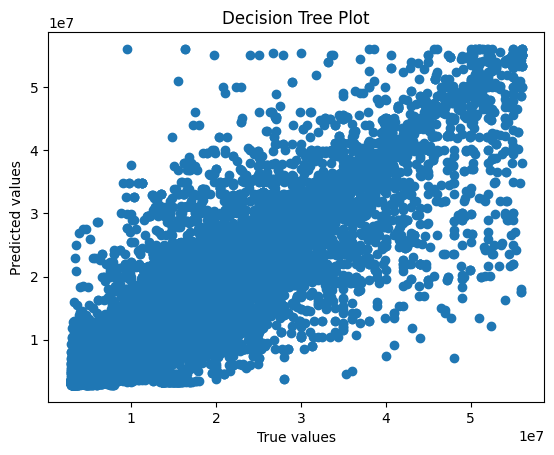

In [ ]:
# Построение графика
plt.scatter(datatest['price'], treepred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Decision Tree Plot")
plt.show()

In [ ]:
# Create and fit the random forest model
RF1 = RandomForestRegressor(n_estimators=100, max_features=8, random_state=42)
RF1.fit(datatrain[['geo_lon', 'geo_lat', 'building_type', 'level', 'levels',
               'rooms', 'area', 'kitchen_area', 'object_type', 'distance_to_cemetery',
               'distance_to_attractions', 'distance_to_green_zone',
               'distance_to_metro_station', 'distance_to_polygon', 'KeyRate']], datatrain['price'])

# Make predictions on test data
yhat1 = RF1.predict(datatest[['geo_lon', 'geo_lat', 'building_type', 'level', 'levels',
                              'rooms', 'area', 'kitchen_area', 'object_type',
                              'distance_to_cemetery', 'distance_to_attractions',
                              'distance_to_green_zone', 'distance_to_metro_station', 'distance_to_polygon', 'KeyRate']])

# Calculate Mean Absolute Error (MAE)
maeRF1 = np.mean((yhat1 - datatest['price'])**2)

# Calculate Mean Absolute Percentage Error (MAPE)
mapeRF1 = np.mean(np.abs((datatest['price'] - yhat1)/datatest['price'])) * 100

# Calculate Root Mean Squared Log Error (MAPE)
rmsleRF1 = np.sqrt(mean_squared_log_error( datatest['price'] , yhat1))


print("Mean Absolute Error: ", maeRF1)
print("Mean Absolute Percentage Error: ", mapeRF1)
print("Root Mean Squared Log Error: ", rmsleRF1 )

# Построение графика
plt.scatter(datatest['price'], yhat1)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Random Forest Regression Plot")
plt.show()

Mean Absolute Error:  4620675645027.625
Mean Absolute Percentage Error:  8.99183850635147
Root Mean Squared Log Error:  0.1456967741293102


In [ ]:
# Time series cross validation for Random Forest
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

# Создаем объект для кросс-валидации по времени
tscv = TimeSeriesSplit(n_splits=5) # n_splits - количество разбиений на тестовые и тренировочные множества

# Инициализируем модель
forestmodel = RandomForestRegressor()

# Переменные для хранения результатов
scores = []

# Цикл по каждому разбиению
for train_index, test_index in tscv.split(datatrain):
    # Разделяем данные на тренировочный и тестовый наборы
    datatrain_train, datatrain_test = datatrain.iloc[train_index], datatrain.iloc[test_index]

    # Обучаем модель на тренировочном наборе
    forestmodel.fit(datatrain.iloc[train_index][['geo_lon', 'geo_lat', 'building_type', 'level', 'levels','rooms',
                         'area', 'kitchen_area', 'object_type','distance_to_cemetery', 'distance_to_attractions',
                        'distance_to_green_zone', 'distance_to_metro_station',
                         'distance_to_polygon', 'KeyRate']], datatrain_train['priceL'])

    # Делаем прогноз на тестовом наборе
    forestpred = forestmodel.predict(datatest[['geo_lon', 'geo_lat', 'building_type', 'level', 'levels','rooms',
                         'area', 'kitchen_area', 'object_type','distance_to_cemetery', 'distance_to_attractions',
                        'distance_to_green_zone', 'distance_to_metro_station',
                         'distance_to_polygon', 'KeyRate']])

    # Добавляем оценку качества модели в список
    scores.append(np.mean(np.abs((datatest['priceL'] - forestpred)/datatest['priceL'])) * 100)

# Выводим среднюю оценку качества модели
print("Средняя оценка качества модели Random Forest:", np.mean(scores))

Средняя оценка качества модели Decision Tree: 1.0297745073017224


In [ ]:
# AXGBoost model

# Create and fit the GBM model
boostRF1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=5000, max_depth=4, random_state=42, enable_categorical=True)
boostRF1.fit(datatrain[['geo_lon', 'geo_lat', 'building_type', 'level', 'levels', 'rooms',
                    'area', 'kitchen_area', 'object_type', 'distance_to_cemetery',
                    'distance_to_attractions', 'distance_to_green_zone',
                    'distance_to_metro_station', 'distance_to_polygon', 'KeyRate']], datatrain['price'])

# Make predictions on test data
yhat_boost1 = boostRF1.predict(datatest[['geo_lon', 'geo_lat', 'building_type',
                                          'level', 'levels', 'rooms', 'area',
                                          'kitchen_area', 'object_type',
                                          'distance_to_cemetery',
                                          'distance_to_attractions',
                                          'distance_to_green_zone',
                                          'distance_to_metro_station', 'distance_to_polygon', 'KeyRate']])

# Calculate Mean Absolute Error (MAE)
maeBT1 = np.mean((yhat_boost1 - datatest['price'])**2)

# Calculate Mean Absolute Percentage Error (MAPE)
mapeBT1 = np.mean(np.abs((datatest['price'] - yhat_boost1) / datatest['price'])) * 100

# Calculate Root Mean Squared Log Error (MAPE)
rmsleBT1 = np.sqrt(mean_squared_log_error( datatest['price'] , np.abs(yhat_boost1)))

print("Mean Absolute Error: ", maeBT1)
print("Mean Absolute Percentage Error: ", mapeBT1)
print("Root Mean Squared Log Error: ", rmsleBT1 )

Mean Absolute Error:  4456511025529.492
Mean Absolute Percentage Error:  10.062408143995723
Root Mean Squared Log Error:  0.15389105713907558


In [ ]:
# Calculate Root Mean Squared Log Error (MAPE)
rmsleBT1 = np.sqrt(mean_squared_log_error( datatest['price'] , np.abs(yhat_boost1)))

print("Root Mean Squared Log Error: ", rmsleBT1 )

Root Mean Squared Log Error:  0.16847737914537025


In [ ]:
# Time series cross validation for Extreme Gradient Boosting
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

# Создаем объект для кросс-валидации по времени
tscv = TimeSeriesSplit(n_splits=5) # n_splits - количество разбиений на тестовые и тренировочные множества

# Инициализируем модель
boostRF = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=5000, max_depth=4, random_state=42,enable_categorical=True)

# Переменные для хранения результатов
scores = []

# Цикл по каждому разбиению
for train_index, test_index in tscv.split(datatrain):
    # Разделяем данные на тренировочный и тестовый наборы
    datatrain_train, datatrain_test = datatrain.iloc[train_index], datatrain.iloc[test_index]

    # Обучаем модель на тренировочном наборе
    boostRF.fit(datatrain.iloc[train_index][['area','distance_to_attractions', 'distance_to_green_zone', 'levels',
                 'kitchen_area', 'geo_lat', 'object_type', 'distance_to_cemetery',
                  'distance_to_polygon','level','geo_lon', 'distance_to_metro_station',
                 'rooms','KeyRate', 'building_type']], datatrain_train['priceL'])

    # Делаем прогноз на тестовом наборе
    boostRFpred = boostRF.predict(datatest[['area','distance_to_attractions', 'distance_to_green_zone', 'levels',
                 'kitchen_area', 'geo_lat', 'object_type', 'distance_to_cemetery',
                  'distance_to_polygon','level','geo_lon', 'distance_to_metro_station',
                 'rooms','KeyRate', 'building_type']])

    # Добавляем оценку качества модели в список
    scores.append(np.mean(np.abs((datatest['priceL'] - boostRFpred)/datatest['priceL'])) * 100)

# Выводим среднюю оценку качества модели
print("Средняя оценка качества модели XGBoost:", np.mean(scores))

Средняя оценка качества модели XGBoost: 0.9918149365089552


[0.48381132 0.10822256 0.04636931 0.04429932 0.04390104 0.04054918
 0.03923085 0.03677728 0.03432288 0.0336429  0.03345157 0.02333291
 0.01242372 0.01031876 0.00934645]


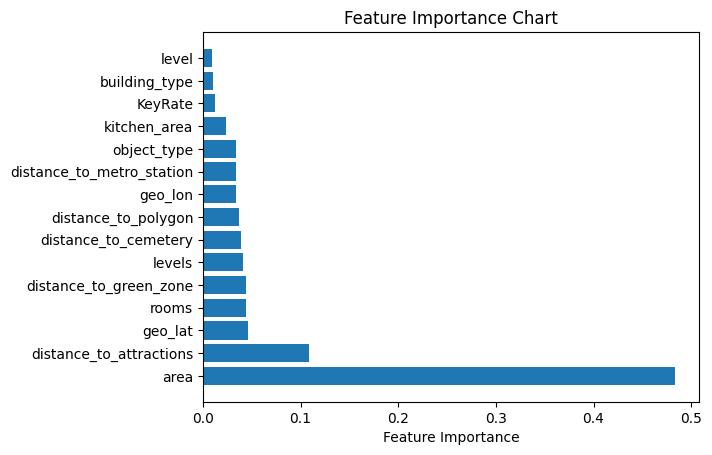

In [ ]:
# Получение информации о важности признаков
boostRF1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 1000, max_depth = 10, learning_rate = 0.1, enable_categorical = True)
boostRF1.fit(datatrain[['area','distance_to_attractions', 'geo_lat', 'rooms','distance_to_green_zone','levels','distance_to_cemetery',
                 'distance_to_polygon','geo_lon','distance_to_metro_station','object_type','kitchen_area','KeyRate', 'building_type','level']], datatrain['priceL'])

feature_importances = boostRF1.feature_importances_
feature_names = ['area','distance_to_attractions', 'geo_lat', 'rooms','distance_to_green_zone','levels','distance_to_cemetery',
                 'distance_to_polygon','geo_lon','distance_to_metro_station','object_type','kitchen_area','KeyRate', 'building_type','level']

print(feature_importances)
# Визуализация значимостей переменных
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance Chart")
plt.show()

[7.83787493e-01 7.89359851e-02 1.75318749e-02 6.73247076e-03
 1.93598650e-02 1.81364286e-02 1.24748688e-02 1.04525906e-02
 1.01845186e-02 1.05610929e-02 1.72671893e-03 1.89360359e-02
 6.89306941e-03 5.74921107e-04 3.71206600e-03]


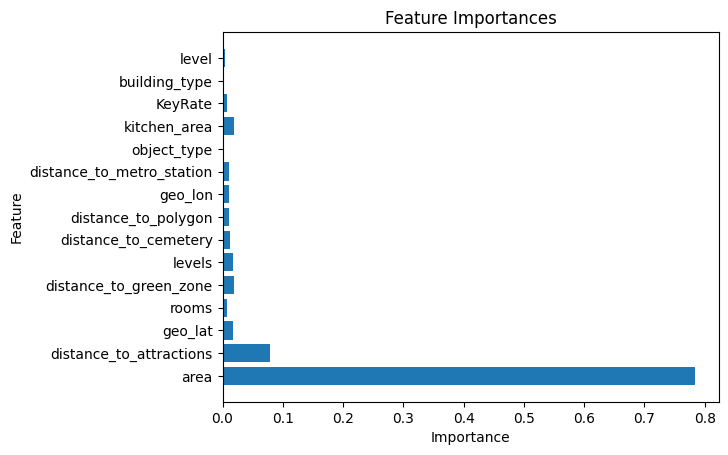

In [11]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X_train = datatrain[['area','distance_to_attractions', 'geo_lat', 'rooms','distance_to_green_zone','levels','distance_to_cemetery',
                 'distance_to_polygon','geo_lon','distance_to_metro_station','object_type','kitchen_area','KeyRate', 'building_type','level']]
y_train = datatrain['priceL']

rf_regressor = RandomForestRegressor(n_estimators=400, max_depth=15)
rf_regressor.fit(X_train, y_train)

importances = rf_regressor.feature_importances_

# Create a list of feature names
feature_names = ['area','distance_to_attractions', 'geo_lat', 'rooms','distance_to_green_zone','levels','distance_to_cemetery',
                 'distance_to_polygon','geo_lon','distance_to_metro_station','object_type','kitchen_area','KeyRate', 'building_type','level']
print(importances)
# Create a bar chart of feature importances
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

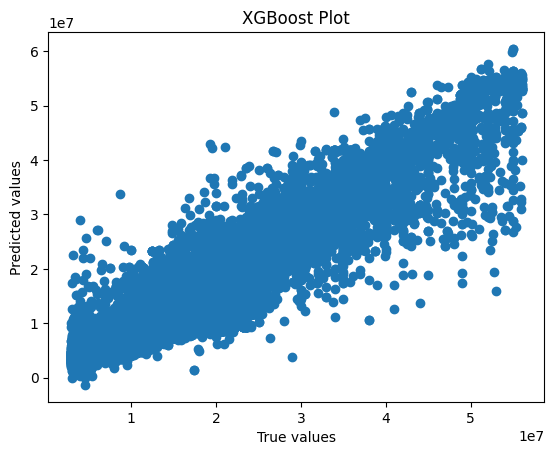

In [ ]:
# Построение графика
plt.scatter(datatest['price'], yhat_boost1)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("XGBoost Plot")
plt.show()

In [ ]:
# Разделение данных на тренировочный и тестовый наборы
X_train = datatrain[['geo_lon', 'geo_lat', 'building_type', 'level', 'levels', 'rooms',
        'area', 'kitchen_area', 'object_type', 'distance_to_cemetery',
        'distance_to_attractions', 'distance_to_green_zone',
        'distance_to_metro_station', 'distance_to_polygon', 'KeyRate']]
y_train = datatrain['priceL']

X_test = datatest[['geo_lon', 'geo_lat', 'building_type', 'level', 'levels', 'rooms',
        'area', 'kitchen_area', 'object_type', 'distance_to_cemetery',
        'distance_to_attractions', 'distance_to_green_zone',
        'distance_to_metro_station', 'distance_to_polygon', 'KeyRate']]
y_test = datatest['priceL']

In [ ]:
num_features = list(X_train.columns)
num_features

['geo_lon',
 'geo_lat',
 'building_type',
 'level',
 'levels',
 'rooms',
 'area',
 'kitchen_area',
 'object_type',
 'distance_to_cemetery',
 'distance_to_attractions',
 'distance_to_green_zone',
 'distance_to_metro_station',
 'distance_to_polygon',
 'KeyRate']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features)
    ])

X_train_norm = preprocessor.fit_transform(X_train)
X_test_norm = preprocessor.transform(X_test)
X_train.shape, X_test.shape

((393588, 15), (98398, 15))

In [ ]:
print(X_train_norm.shape[1])

15


In [ ]:
# Создание модели
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(1, activation='relu'))

# Компиляция модели
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mape'])

In [ ]:
# создадим папку для моделей и лога
os.makedirs("models", exist_ok=True)

In [ ]:
# создаем чекпойнты для сохранения модели и редьюс он плато схедуллер
checkpoint = keras.callbacks.ModelCheckpoint("models/model.keras", verbose=0,
                                             save_best_only=True, monitor='val_mape',
                                             save_weights_only=False, mode='auto')
# если используем .h5, то используется интерфейс сохранения keras
# если бы мы хотели сохранять все модели, а потом провести детальный анализ, то следовало бы поставить save_best_only=False и задать путь в
# стиле 'models/model_{epoch:02d}_{val_acc:.2f}.h5'  - чтобы модели друг друга не перезаписывали

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                              patience=5, min_lr=0.001/100)

In [ ]:
# тренируем модель
history = model.fit(
    X_train_norm, y_train,
    batch_size=256,
    epochs=50,
    verbose=1,
    validation_data=(X_test_norm, y_test), callbacks=[checkpoint, reduce_lr])

Epoch 1/50
1538/1538 [==============================] - 14s 7ms/step - loss: 14.0679 - mape: 17.5634 - val_loss: 0.1919 - val_mape: 2.2152 - lr: 0.0010
Epoch 2/50
1538/1538 [==============================] - 5s 3ms/step - loss: 6.0905 - mape: 12.2872 - val_loss: 0.1661 - val_mape: 2.1396 - lr: 0.0010
Epoch 3/50
1538/1538 [==============================] - 6s 4ms/step - loss: 4.4533 - mape: 10.5753 - val_loss: 0.2275 - val_mape: 2.6309 - lr: 0.0010
Epoch 4/50
1538/1538 [==============================] - 5s 3ms/step - loss: 3.3968 - mape: 9.3108 - val_loss: 0.2403 - val_mape: 2.7335 - lr: 0.0010
Epoch 5/50
1538/1538 [==============================] - 7s 5ms/step - loss: 2.5842 - mape: 8.1103 - val_loss: 0.1547 - val_mape: 2.1074 - lr: 0.0010
Epoch 6/50
1538/1538 [==============================] - 5s 3ms/step - loss: 1.7915 - mape: 6.6537 - val_loss: 0.0905 - val_mape: 1.4817 - lr: 0.0010
Epoch 7/50
1538/1538 [==============================] - 6s 4ms/step - loss: 1.2179 - mape: 5.4564 - v

In [ ]:
frame_history_df = pd.DataFrame.from_dict(history.history)

In [ ]:
frame_history_df[frame_history_df["val_mape"] == frame_history_df["val_mape"].min()]

,loss,mape,val_loss,val_mape,lr
15,0.045509,0.967663,0.03395,0.837948,0.001


In [ ]:
frame_history_df.to_csv("models_log.csv", index=False)

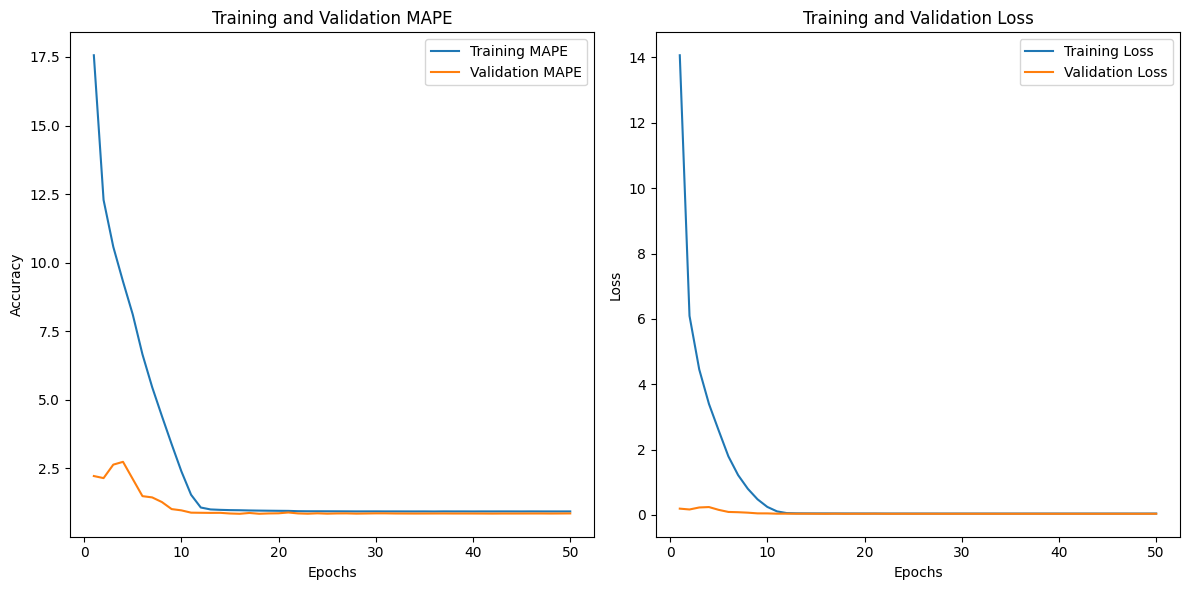

In [ ]:
# Задаем размер графиков
plt.figure(figsize=(12, 6))

# График точности (accuracy)
plt.subplot(1, 2, 1)
sns.lineplot(x=frame_history_df.index + 1, y=frame_history_df['mape'], label='Training MAPE')
sns.lineplot(x=frame_history_df.index + 1, y=frame_history_df['val_mape'], label='Validation MAPE')
plt.title('Training and Validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# График потерь (loss)
plt.subplot(1, 2, 2)
sns.lineplot(x=frame_history_df.index + 1, y=frame_history_df['loss'], label='Training Loss')
sns.lineplot(x=frame_history_df.index + 1, y=frame_history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Вывод графиков
plt.tight_layout()
plt.show()

In [ ]:
# загрузим лучшую по точности модель:
model = keras.models.load_model("models/model.keras")

In [ ]:
# так выглядит предикты, их надо решейпить в -1
model.predict(X_test_norm, verbose=0)

array([[15.486876],
       [15.502757],
       [15.705177],
       ...,
       [15.490048],
       [15.503376],
       [16.383192]], dtype=float32)

In [ ]:
embed_list = model(X_test_norm[:256]).numpy()
for batch_point in range(256, len(X_test), 256):
  embed_list = np.vstack((
      embed_list,
      model(X_test_norm[batch_point:batch_point + 256]).numpy()))

In [ ]:
len(datatest)

98398

In [ ]:
el = pd.DataFrame(embed_list)
el.to_csv('FCLpredictionL.csv', sep='\t', encoding='utf-8')